##  미니 프로젝트 : 
## 가위바위보 분류기를 만들자

#### 1. 라이브러리 버전 확인

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.11.0
1.23.5


#### 2.데이터 만들기 

##### 사이트를 이용하여 데이터를 직접 촬영해 만들기
https://teachablemachine.withgoogle.com/

데이터 촬영 후 클라우드 이미지 압축 해체

#### 3. 데이터 불러오기 및 리사이즈 하기

가위, 바위, 보 이미지도 28x28로 만들어야 함

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


- 가위 이미지 사이즈 변경

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getcwd() + "/rock_scissor_paper/scissor-samples"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


- 바위 이미지 사이즈 변경 

In [4]:
image_dir_path = os.getcwd() + "/rock_scissor_paper/rock-samples"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

103  images to be resized.
103  images resized.
바위 이미지 resize 완료!


- 보 이미지 사이즈 변경

In [5]:
image_dir_path = os.getcwd() + "/rock_scissor_paper/paper-samples"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#### 4. 데이터 읽는 load_data() 함수 생성}

가위: 0, 바위: 1, 보: 2 로 라벨링

In [370]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getcwd() + "/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


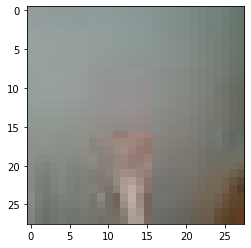

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

데이터 픽셀화하니 정말 잘 안보이네요..이거 가위 데이터인데 주먹처럼 보이네..;;;
일단은 진행해보고 정확도 많이 낮으면 다시 데이터셋 찍는걸로

#### 6. 딥러닝 네트워크 설계하기 

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model1=keras.models.Sequential()
model1.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기 3클래스

print('Model에 추가된 Layer 개수: ', len(model1.layers))

model1.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (No

https://bcho.tistory.com/1149

#### 7. 딥러닝 네트워크 학습시키기

In [9]:
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model1.fit(x_train_norm, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 23ms/step - loss: 1.1057 - accuracy: 0.3399
Epoch 2/30
10/10 [==============================] - 0s 16ms/step - loss: 1.0937 - accuracy: 0.3630
Epoch 3/30
10/10 [==============================] - 0s 20ms/step - loss: 1.0758 - accuracy: 0.4818
Epoch 4/30
10/10 [==============================] - 0s 28ms/step - loss: 1.0700 - accuracy: 0.4719
Epoch 5/30
10/10 [==============================] - 0s 23ms/step - loss: 1.0517 - accuracy: 0.3795
Epoch 6/30
10/10 [==============================] - 0s 22ms/step - loss: 1.0283 - accuracy: 0.4983
Epoch 7/30
10/10 [==============================] - 0s 25ms/step - loss: 0.9943 - accuracy: 0.5248
Epoch 8/30
10/10 [==============================] - 0s 18ms/step - loss: 0.9490 - accuracy: 0.4983
Epoch 9/30
10/10 [==============================] - 0s 19ms/step - loss: 0.9074 - accuracy: 0.5545
Epoch 10/30
10/10 [==============================] - 0s 15ms/step - loss: 0.9151 - accuracy: 0.5215
Epoch 11/

에포치 더 반복 시 정확도가 높아잘 수 있을 것 같아 10회에서 30회로 증가시켰고, 0.7점대의 훈련 정확도를 보였다.

#### 테스트

테스트 자료는 아이펠에서 제공하는 데이터셋으로 진행

In [10]:
image_dir_path = os.getcwd() + "/data/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("테스트 바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
테스트 바위 이미지 resize 완료!


In [11]:
image_dir_path = os.getcwd() + "/data/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("테스트 가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
테스트 가위 이미지 resize 완료!


In [12]:
image_dir_path = os.getcwd() + "/data/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("테스트 보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
테스트 보 이미지 resize 완료!


In [13]:

def test_load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getcwd() + "/data/test"
(x_test, y_test)=test_load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


훈련시킨 model을 사용하여 test_accuracy를 측정

In [14]:
# 모델 시험
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 168.4376 - accuracy: 0.4667 - 380ms/epoch - 38ms/step
test_loss: 168.4375762939453 
test_accuracy: 0.46666666865348816


정확도가 50%도 안되어 처참하다.
이전 데이터를 픽셀화 했을 때 가위인데도 주먹처럼 보이는 문제들이 있어서 데이터셋을 다시 만들어보기로 했다.

## 정확도 향상을 위한 여러 방법

#### 1. 데이터셋 다시 찍어 훈련시켜보기

이전 데이터 셋이 가위바위보 사진이 각도가 달라졌어서 한 방향(손바닥이 보이는 방향)으로만 데이터셋을 만들어서 훈련시켜보겠다

In [15]:
# 이미지 사이즈 변경

image_dir_path = os.getcwd() + "/rock_scissor_paper/scissor2"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getcwd() + "/rock_scissor_paper/rock2"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getcwd() + "/rock_scissor_paper/paper2"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [216]:
import numpy as np

def load_data1(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getcwd() + "/rock_scissor_paper"
(x_train1, y_train1)=load_data1(image_dir_path)
x_train1_norm = x_train1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train1.shape))
print("y_train shape: {}".format(y_train1.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  1


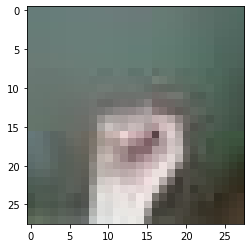

In [17]:
import matplotlib.pyplot as plt

plt.imshow(x_train1[123])
print('라벨: ', y_train1[123])

......ㅋ

In [18]:
model2=keras.models.Sequential()
model2.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기 3클래스

print('Model에 추가된 Layer 개수: ', len(model2.layers))

model2.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (

In [19]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train1_norm, y_train1, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 20ms/step - loss: 1.0885 - accuracy: 0.3467
Epoch 2/30
10/10 [==============================] - 0s 16ms/step - loss: 1.0391 - accuracy: 0.7133
Epoch 3/30
10/10 [==============================] - 0s 16ms/step - loss: 0.9473 - accuracy: 0.8300
Epoch 4/30
10/10 [==============================] - 0s 17ms/step - loss: 0.7915 - accuracy: 0.9500
Epoch 5/30
10/10 [==============================] - 0s 20ms/step - loss: 0.6077 - accuracy: 0.8867
Epoch 6/30
10/10 [==============================] - 0s 17ms/step - loss: 0.4060 - accuracy: 0.9500
Epoch 7/30
10/10 [==============================] - 0s 17ms/step - loss: 0.2417 - accuracy: 0.9867
Epoch 8/30
10/10 [==============================] - 0s 21ms/step - loss: 0.1546 - accuracy: 0.9833
Epoch 9/30
10/10 [==============================] - 0s 22ms/step - loss: 0.0961 - accuracy: 0.9867
Epoch 10/30
10/10 [==============================] - 0s 17ms/step - loss: 0.0599 - accuracy: 0.9933
Epoch 11/

In [20]:
# 모델 시험
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1825.3467 - accuracy: 0.3333 - 373ms/epoch - 37ms/step
test_loss: 1825.3466796875 
test_accuracy: 0.3333333432674408


test_accuracy: 0.3333 정확도가 더 낮아졌다.

#### 2. 데이터셋 더 추가해보기

In [310]:

def load_data2(img_path, number_of_data=603):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    
    for file in glob.iglob(img_path+'/scissor2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/rock2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1 
    
    for file in glob.iglob(img_path+'/paper-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getcwd() + "/rock_scissor_paper"
(x_train2, y_train2)=load_data2(image_dir_path)
x_train_norm2 = x_train2/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train2.shape))
print("y_train shape: {}".format(y_train2.shape))

학습데이터(x_train)의 이미지 개수는 603 입니다.
x_train shape: (603, 28, 28, 3)
y_train shape: (603,)


In [22]:
model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model3.add(keras.layers.MaxPool2D(2,2))
model3.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model3.add(keras.layers.MaxPooling2D((2,2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(32, activation='relu'))
model3.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기 3클래스

print('Model에 추가된 Layer 개수: ', len(model3.layers))

model3.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (

In [23]:
model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model3.fit(x_train_norm2, y_train2, epochs=30)

Epoch 1/30
19/19 [==============================] - 2s 17ms/step - loss: 1.0843 - accuracy: 0.4013
Epoch 2/30
19/19 [==============================] - 0s 16ms/step - loss: 0.9992 - accuracy: 0.5672
Epoch 3/30
19/19 [==============================] - 0s 15ms/step - loss: 0.8996 - accuracy: 0.6335
Epoch 4/30
19/19 [==============================] - 0s 15ms/step - loss: 0.8135 - accuracy: 0.6633
Epoch 5/30
19/19 [==============================] - 0s 18ms/step - loss: 0.7265 - accuracy: 0.7264
Epoch 6/30
19/19 [==============================] - 0s 16ms/step - loss: 0.6544 - accuracy: 0.7512
Epoch 7/30
19/19 [==============================] - 0s 24ms/step - loss: 0.5895 - accuracy: 0.7546
Epoch 8/30
19/19 [==============================] - 0s 17ms/step - loss: 0.5396 - accuracy: 0.7828
Epoch 9/30
19/19 [==============================] - 0s 22ms/step - loss: 0.4793 - accuracy: 0.7977
Epoch 10/30
19/19 [==============================] - 0s 17ms/step - loss: 0.4319 - accuracy: 0.8308
Epoch 11/

In [24]:
# 모델 시험
test_loss, test_accuracy = model3.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 564.6611 - accuracy: 0.4900 - 359ms/epoch - 36ms/step
test_loss: 564.6610717773438 
test_accuracy: 0.49000000953674316


두개의 데이터를 더하니 더 학습률이 높아ㅏ졌다

#### 3. 데이터  argument

keras 의 ImageDataGenerator 이용
https://velog.io/@ym980118/%EB%94%A5%EB%9F%AC%EB%8B%9D-Keras-ImageDataGenerator%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95-Data-Augmentation

- 좌우 반전의 경우

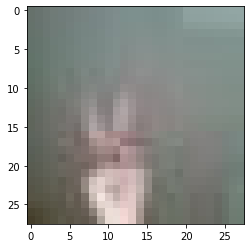

In [150]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 좌우 반전 , 좌우반전을 True로 했지만 keras에서 랜덤으로 할 지 말 지 결정!..즉 좌우 반전 안 될 수도 있음.
data_generator = ImageDataGenerator(horizontal_flip = True)

image_batch = np.expand_dims(x_train1[13],axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')

plt.imshow(aug_image)

- 상하 반전의 경우

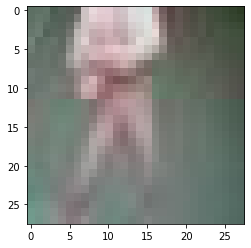

In [36]:
data_generator = ImageDataGenerator(vertical_flip = True) # 회전 

image_batch = np.expand_dims(x_train1[50],axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')

plt.imshow(aug_image)

- 회전 할 경우

AttributeError: 'numpy.ndarray' object has no attribute 'save'

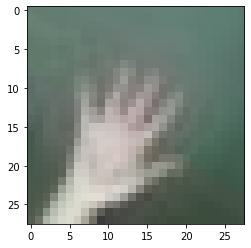

In [262]:
from PIL import Image

data_generator = ImageDataGenerator(rotation_range=160.0) # 

image_batch = np.expand_dims(x_train1[245],axis=0) #4차원으로 늘려주기

# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
#data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')

plt.imshow(aug_image)

가위바위보 마다 각 200장의 사진이 있으므로 50장 기본, 50장하반전, 20장은 상하 좌우, 20장은 로테이션으로 진행한다

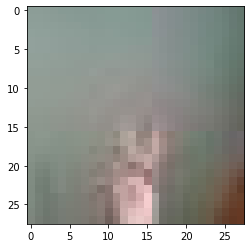

In [323]:
plt.imshow(x_train2[99])

In [347]:
y_train2[499]

2

In [360]:
image_dir_path = os.getcwd() + "/rock_scissor_paper"
(x_train4, y_train4)=load_data1(image_dir_path)

for i in range(300):
    if 40<=i<60 or 140<=i<160 or 240<=i<260:
        gen_hflip = ImageDataGenerator(horizontal_flip = True) # 
        image_batch = np.expand_dims(x_train4[i],axis=0) #4차원으로 늘려주기
        # ImageDataGenerator 적용하려면 fit과 flow를 해야함.
        gen_hflip.fit(image_batch)
        data_gen_iter = gen_hflip.flow(image_batch)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        x_train4[i] = aug_image

    elif 60<=i<80 or 160<=i<180 or 260<=i<280:
        gen_vflip = ImageDataGenerator(vertical_flip = True) # 
        image_batch = np.expand_dims(x_train4[i],axis=0) #4차원으로 늘려주기
        # ImageDataGenerator 적용하려면 fit과 flow를 해야함.
        gen_vflip.fit(image_batch)
        data_gen_iter = gen_vflip.flow(image_batch)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        x_train4[i] = aug_image
        
    elif 80<=i<100 or 180<=i<200 or 280<=i<300:
        gen_rotation = ImageDataGenerator(rotation_range=180.0) # 
        image_batch = np.expand_dims(x_train4[i],axis=0) #4차원으로 늘려주기
        # ImageDataGenerator 적용하려면 fit과 flow를 해야함.
        gen_rotation.fit(image_batch)
        data_gen_iter = gen_rotation.flow(image_batch)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        x_train4[i] = aug_image

        
x_train4_norm = x_train4/255.0

학습데이터(x_train)의 이미지 개수는 300 입니다.


In [361]:
x_train4.shape

(300, 28, 28, 3)

- 좌우 반전

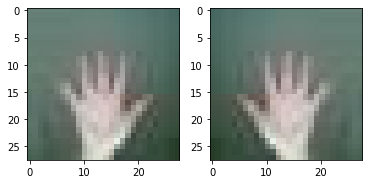

In [362]:
plt.subplot(1,2,1)
plt.imshow(x_train1[256]) 

plt.subplot(1,2,2)
plt.imshow(x_train4[256])

- 각도 회전

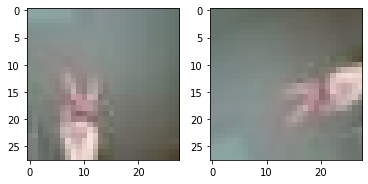

In [363]:
plt.subplot(1,2,1)
plt.imshow(x_train1[89]) 

plt.subplot(1,2,2)
plt.imshow(x_train4[89])

- 상하 반전

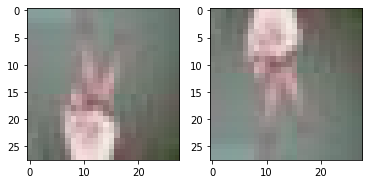

In [364]:
plt.subplot(1,2,1)
plt.imshow(x_train1[75]) 

plt.subplot(1,2,2)
plt.imshow(x_train4[75])

In [365]:
model4=keras.models.Sequential()
model4.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model4.add(keras.layers.MaxPool2D(2,2))
model4.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model4.add(keras.layers.MaxPooling2D((2,2)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(32, activation='relu'))
model4.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기 3클래스

print('Model에 추가된 Layer 개수: ', len(model4.layers))

model4.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (

In [366]:
model4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model4.fit(x_train4_norm, y_train4, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 21ms/step - loss: 1.0979 - accuracy: 0.3433
Epoch 2/30
10/10 [==============================] - 0s 23ms/step - loss: 1.0504 - accuracy: 0.4633
Epoch 3/30
10/10 [==============================] - 0s 19ms/step - loss: 0.9991 - accuracy: 0.6533
Epoch 4/30
10/10 [==============================] - 0s 21ms/step - loss: 0.9074 - accuracy: 0.7267
Epoch 5/30
10/10 [==============================] - 0s 22ms/step - loss: 0.8096 - accuracy: 0.6533
Epoch 6/30
10/10 [==============================] - 0s 19ms/step - loss: 0.6687 - accuracy: 0.7967
Epoch 7/30
10/10 [==============================] - 0s 19ms/step - loss: 0.5568 - accuracy: 0.8300
Epoch 8/30
10/10 [==============================] - 0s 19ms/step - loss: 0.4513 - accuracy: 0.8633
Epoch 9/30
10/10 [==============================] - 0s 28ms/step - loss: 0.3664 - accuracy: 0.8833
Epoch 10/30
10/10 [==============================] - 0s 26ms/step - loss: 0.3035 - accuracy: 0.9200
Epoch 11/

In [367]:
# 모델 시험
test_loss, test_accuracy = model4.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1136.6987 - accuracy: 0.3700 - 265ms/epoch - 27ms/step
test_loss: 1136.69873046875 
test_accuracy: 0.3700000047683716


#### 4. 데이터 정규화 + 600 데이터셋

In [371]:


image_dir_path = os.getcwd() + "/rock_scissor_paper"
(x_train5, y_train5)=load_data2(image_dir_path)

for i in range(600):
    if 50<=i<100 or 250<=i<300 or 450<=i<500:
        gen_hflip = ImageDataGenerator(horizontal_flip = True) # 
        image_batch = np.expand_dims(x_train5[i],axis=0) #4차원으로 늘려주기
        # ImageDataGenerator 적용하려면 fit과 flow를 해야함.
        gen_hflip.fit(image_batch)
        data_gen_iter = gen_hflip.flow(image_batch)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        x_train5[i] = aug_image

    elif 100<=i<150 or 300<=i<350 or 500<=i<550:
        gen_vflip = ImageDataGenerator(vertical_flip = True) # 
        image_batch = np.expand_dims(x_train5[i],axis=0) #4차원으로 늘려주기
        # ImageDataGenerator 적용하려면 fit과 flow를 해야함.
        gen_vflip.fit(image_batch)
        data_gen_iter = gen_vflip.flow(image_batch)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        x_train5[i] = aug_image
        
    elif 150<=i<200 or 350<=i<400 or 550<=i:
        gen_rotation = ImageDataGenerator(rotation_range=180.0) # 
        image_batch = np.expand_dims(x_train5[i],axis=0) #4차원으로 늘려주기
        # ImageDataGenerator 적용하려면 fit과 flow를 해야함.
        gen_rotation.fit(image_batch)
        data_gen_iter = gen_rotation.flow(image_batch)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        x_train5[i] = aug_image

        
x_train5_norm = x_train5/255.0

학습데이터(x_train)의 이미지 개수는 600 입니다.


In [431]:
model5=keras.models.Sequential()
model5.add(keras.layers.Conv2D(16, (3,3),padding='valid', activation='relu', input_shape=(28,28,3)))
model5.add(keras.layers.MaxPool2D(2,2))
model5.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model5.add(keras.layers.MaxPooling2D((2,2)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(32, activation='relu'))
model5.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기 3클래스

print('Model에 추가된 Layer 개수: ', len(model5.layers))

model5.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 800)               0         
                                                                 
 dense_51 (Dense)            

In [432]:
model5.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model5.fit(x_train5_norm, y_train5, epochs=30)

Epoch 1/30
19/19 [==============================] - 1s 15ms/step - loss: 1.1020 - accuracy: 0.3217
Epoch 2/30
19/19 [==============================] - 0s 15ms/step - loss: 1.0876 - accuracy: 0.4279
Epoch 3/30
19/19 [==============================] - 0s 15ms/step - loss: 1.0611 - accuracy: 0.5124
Epoch 4/30
19/19 [==============================] - 0s 15ms/step - loss: 1.0531 - accuracy: 0.4113
Epoch 5/30
19/19 [==============================] - 0s 16ms/step - loss: 0.9983 - accuracy: 0.5456
Epoch 6/30
19/19 [==============================] - 0s 16ms/step - loss: 0.9263 - accuracy: 0.5821
Epoch 7/30
19/19 [==============================] - 0s 14ms/step - loss: 0.8721 - accuracy: 0.5954
Epoch 8/30
19/19 [==============================] - 0s 15ms/step - loss: 0.7944 - accuracy: 0.6965
Epoch 9/30
19/19 [==============================] - 0s 17ms/step - loss: 0.7358 - accuracy: 0.7197
Epoch 10/30
19/19 [==============================] - 0s 21ms/step - loss: 0.6842 - accuracy: 0.7446
Epoch 11/

In [375]:
# 모델 시험
test_loss, test_accuracy = model5.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 675.9851 - accuracy: 0.5367 - 299ms/epoch - 30ms/step
test_loss: 675.985107421875 
test_accuracy: 0.5366666913032532


#### 4. 하이퍼 파라미터 설정 

In [456]:
model6=keras.models.Sequential()
model6.add(keras.layers.Conv2D(64, (6,6),activation='relu', input_shape=(28,28,3)))
##model6.add(keras.layers.MaxPool2D(2,2))
model6.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
##model6.add(keras.layers.MaxPooling2D((2,2)))
model6.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(64, activation='relu'))
model6.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기 3클래스

print('Model에 추가된 Layer 개수: ', len(model5.layers))

model6.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 23, 23, 64)        6976      
                                                                 
 conv2d_73 (Conv2D)          (None, 21, 21, 32)        18464     
                                                                 
 conv2d_74 (Conv2D)          (None, 19, 19, 16)        4624      
                                                                 
 flatten_32 (Flatten)        (None, 5776)              0         
                                                                 
 dense_66 (Dense)            (None, 64)                369728    
                                                                 
 dense_67 (Dense)            (None, 3)                 195       
                                                                 
Total params: 399,987
Trainab

https://keras.io/ko/getting-started/sequential-model-guide/

In [457]:
model6.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model6.fit(x_train5_norm, y_train5, epochs=30)

Epoch 1/30
19/19 [==============================] - 3s 83ms/step - loss: 1.1054 - accuracy: 0.3582
Epoch 2/30
19/19 [==============================] - 1s 78ms/step - loss: 1.1003 - accuracy: 0.3483
Epoch 3/30
19/19 [==============================] - 2s 78ms/step - loss: 1.0814 - accuracy: 0.4013
Epoch 4/30
19/19 [==============================] - 2s 80ms/step - loss: 0.9609 - accuracy: 0.5108
Epoch 5/30
19/19 [==============================] - 1s 73ms/step - loss: 0.8845 - accuracy: 0.5572
Epoch 6/30
19/19 [==============================] - 2s 86ms/step - loss: 0.8254 - accuracy: 0.6153
Epoch 7/30
19/19 [==============================] - 1s 78ms/step - loss: 0.7716 - accuracy: 0.6667
Epoch 8/30
19/19 [==============================] - 2s 82ms/step - loss: 0.7046 - accuracy: 0.7032
Epoch 9/30
19/19 [==============================] - 1s 77ms/step - loss: 0.6475 - accuracy: 0.7280
Epoch 10/30
19/19 [==============================] - 2s 81ms/step - loss: 0.5980 - accuracy: 0.7662
Epoch 11/

In [459]:
# 모델 시험
test_loss, test_accuracy = model6.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1033.2107 - accuracy: 0.4133 - 173ms/epoch - 17ms/step
test_loss: 1033.210693359375 
test_accuracy: 0.41333332657814026


https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

#### 회고

모델의 정확도가 쉽게 60을 넘지 못했다. 높게 나와도 최대 52퍼센트 정도..

좀 다른 분꼐 여쭤보니 데이터셋을 다른 분들 데이터셋도 다 합쳐 7200개의 데이터를 학습시키니 정확도가 높게 나왔다고 하였다. 내 데이터셋이 상대적으로 부족했는지 싶다.
또한 웅제 퍼실님의 데이터셋을 따라 데이터를 돌리긴 했는데.. 색감도 비슷하게 조정을 했어야 하나..? 라는 생각도 들었다.

하이퍼 파라미터의 경우 맥스 풀링 레이어를 제외하니 정확도가 상대적으로 높게 나오는 경향이 있었다.
맥스 풀링 레이어의 경우 데이터 차원을 감소시켜 메모리 감소로 신경망의 계산 효율을 낮게 한다고 한다.
https://keras.io/api/layers/pooling_layers/max_pooling2d/
https://m.blog.naver.com/khm159/221811601286

하지만 차원을 감소시킼는 경우 데이터 feature가 날라가 미세한 정보를 놓칠 수 있으므로 컨볼루션의 스트라이드를 높이는 방향으로 선호된다고 한다.
맥스 풀링 레이어를 없애고 컨볼루션 스트라이드를 (3,3) 에서 (6,6) 으로 변경하여서 더 높은 정확도를 평균적으로 가지게 되었다.

dense 레이어도 너무 깊게 64,128 쌓는것이 아닌 32 레이어로도 충분ㄴ했다. 
오히려 깊게 쌓일수록 

최적화 함수를 아담 아닌 아다델타로 변경하기도 하였지만 효율은 좋지 않아 원래대로 진행하였다.


그리고 하이퍼 파라미터를 조정할떼 너무 떄려 맞추는 식으로 진행했는데..
추후에 하이퍼 파라미터를 검증을 통해 최적의 하이퍼 파라미터를 찾을 수 있는 방향으로 코드를 진행시키고 싶다. 